# Telecom Customer Churn Prediction & Analysis

**Business Problem:**  
Customer churn (leaving the company) is expensive. Retaining customers is cheaper than acquiring new ones. SyriaTel wants to predict which customers are at risk of churn so they can intervene with targeted retention efforts (discounts, service improvements).

**Goal:** Build a machine learning model to predict which customers are likely to churn so the company can intervene with targeted retention efforts (discounts, service improvements).

**Dataset:** The dataset contains historical information about customer usage and their patterns and the target variable i.e. whether they churn or not



In [29]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Set visualization style
sns.set_style('darkgrid', {'axes.facecolor':'0.9'})

## Data Loading and Initial Exploration

We load the dataset and perform initial inspections of the structure, statistics, and target variable distribution.

In [30]:
# Load dataset
file_path = 'C:\\Users\\user\\Documents\\phase3\\project\\data\\bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(file_path)

print("DataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
df.describe()
print("\nFirst 5 Rows:")
df.head()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
# missing or duplicate values
print("Missing values in each column:")
print(df.isnull().sum())
print("Number of duplicate rows:")
print(df.duplicated().sum())


Missing values in each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
Number of duplicate rows:
0


## Target Variable Distribution<br>
We analyze the churn column to understand class balance.<br>


In [32]:
# Analyze class distribution
print("Churn Value Counts (Normalized):")
print(df['churn'].value_counts(normalize=True))


Churn Value Counts (Normalized):
churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


**Key Metric Choice:**  
The dataset is highly imbalanced. Most customers (around 85%) did not churn. This confirms our need to use metrics like Recall, Precision, and F1-score.


## Data Preparation and Feature Engineering
We drop irrelevant columns, encode categories, scale numerics so models treat features fairly.

In [33]:
# Check unique values in categorical features
print("Unique values in categorical features:")
print(df[['state', 'international plan','area code', 'voice mail plan']].nunique())

# Drop redundant and unnecessary columns
df_reduced = df.drop(columns=[
    'phone number',
    'total day charge',
    'total eve charge',
    'total night charge',
    'total intl charge'
])


Unique values in categorical features:
state                 51
international plan     2
area code              3
voice mail plan        2
dtype: int64


In [34]:
print(df_reduced.info())
df_reduced.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


## Data Preprocessing: Encoding and Scaling
We convert categorical string variables into numerical formats suitable for scikit-learn models. We also split the data into train and test sets before scaling to prevent data leakage.

In [35]:
# Binary encoding True/False and yes/no
df_reduced['international plan'] = df_reduced['international plan'].map({'yes': 1, 'no': 0})
df_reduced['voice mail plan'] = df_reduced['voice mail plan'].map({'yes': 1, 'no': 0})
df_reduced['churn'] = df_reduced['churn'].map({True: 1, False: 0})

# One-hot encode area code and drop state (too many unique values)
df_reduced = pd.get_dummies(df_reduced, columns=['area code'], drop_first=True, dtype=int)
df_reduced = df_reduced.drop(columns=['state'])
df_reduced.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,area code_415,area code_510
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,0


In [36]:
# Correlation analysis
df_reduced.corr()['churn'].sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total eve minutes         0.092796
total intl minutes        0.068239
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code_510             0.006423
total night calls         0.006141
area code_415            -0.006535
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

## Model Training and Evaluation
We separate data into features (X) and target (y), and then into training and testing sets.

In [37]:
# Train/Test Split
X = df_reduced.drop('churn', axis=1)    
y = df_reduced['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2666, 15), Test shape: (667, 15)


We use StandardScaler to normalize the range of numerical features so they are on the same scale for modeling.

In [38]:
# Select numerical columns to scale
numerical_cols = [
    'account length', 'number vmail messages', 'total day minutes',
    'total day calls', 'total eve minutes',
    'total eve calls', 'total night minutes',
    'total night calls', 'total intl minutes',
    'total intl calls', 'customer service calls'
]
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) 


## Model 1: Logistic Regression (Baseline)
We start with a simple, interpretable logistic regression model. We use class_weight='balanced' to handle the data imbalance internally within the model fitting process.

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       570
           1       0.35      0.74      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Confusion Matrix:
[[436 134]
 [ 25  72]]
ROC-AUC: 0.8156086091517453


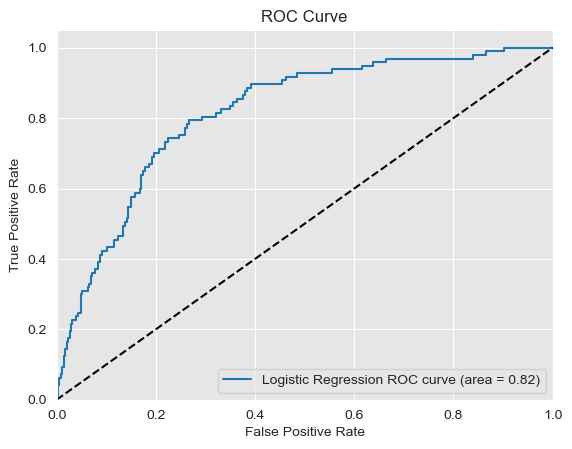

In [39]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:,1]

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
#visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Model 2: Decision Tree Classifier

captures non‑linear patterns and interactions

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.63      0.65      0.64        97

    accuracy                           0.89       667
   macro avg       0.79      0.79      0.79       667
weighted avg       0.89      0.89      0.89       667

Confusion Matrix:
[[533  37]
 [ 34  63]]
ROC-AUC: 0.7922861276903599


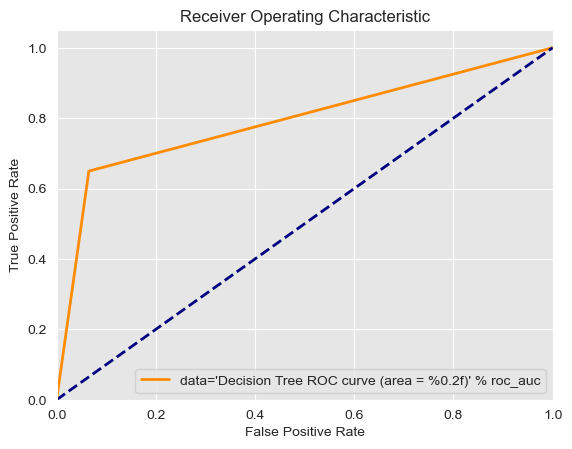

In [40]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:,1]

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))
#visualizing auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tree)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label="data='Decision Tree ROC curve (area = %0.2f)' % roc_auc")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model 3: Tuned Decision Tree Classifier


limit depth and leaf size to avoid overfitting, improve generalization

Tuned Decision Tree Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.68      0.75      0.71        97

    accuracy                           0.91       667
   macro avg       0.82      0.85      0.83       667
weighted avg       0.92      0.91      0.91       667

Confusion Matrix:
[[535  35]
 [ 24  73]]
ROC-AUC: 0.8440947730150118


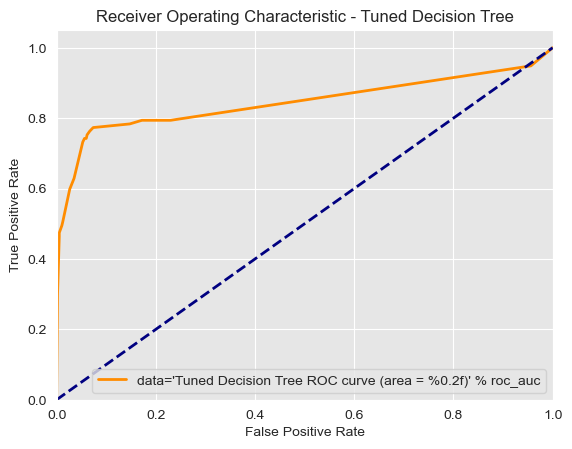

In [41]:
tree_tuned = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)
tree_tuned.fit(X_train, y_train)

y_pred_tree_tuned = tree_tuned.predict(X_test)
y_prob_tree_tuned = tree_tuned.predict_proba(X_test)[:,1]

print("Tuned Decision Tree Report:")
print(classification_report(y_test, y_pred_tree_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree_tuned))
#visualization of auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tree_tuned)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label="data='Tuned Decision Tree ROC curve (area = %0.2f)' % roc_auc")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Tuned Decision Tree')
plt.legend(loc="lower right")
plt.show()


                   Feature  Importance
4        total day minutes    0.261098
12  customer service calls    0.247508
1       international plan    0.218223
6        total eve minutes    0.110333
10      total intl minutes    0.078323
3    number vmail messages    0.054045
11        total intl calls    0.026228
5          total day calls    0.002537
8      total night minutes    0.001705
0           account length    0.000000


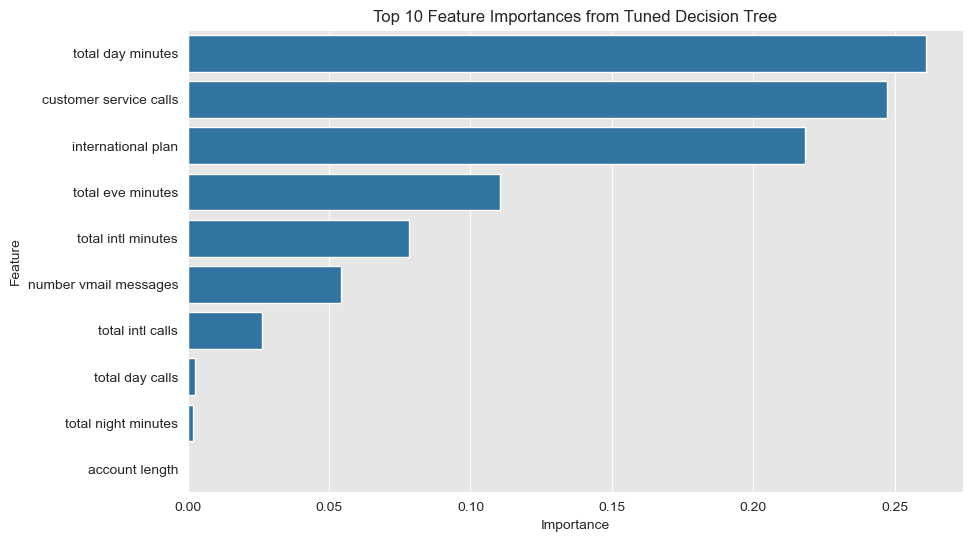

In [42]:
# Feature Importance from Tuned Decision Tree
importances = tree_tuned.feature_importances_
feature_names = X_train.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp.head(10))
# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.title('Top 10 Feature Importances from Tuned Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Results Comparison

**Metric meanings:**
- Recall: % of churners correctly identified (catching customers at risk).
- Precision: % of flagged customers who are actual churners.
- F1: Balance between recall and precision.
- ROC-AUC: Overall ability to separate churn vs non-churn across thresholds.

**interpretation:**
- Logistic Regression: Recall 0.74, Precision 0.35, ROC-AUC 0.82. Good baseline.
- Decision Tree (untuned): Recall 0.65, Precision 0.63, ROC-AUC 0.79. Moderate.
- Decision Tree (tuned): Recall 0.75, Precision 0.68, ROC-AUC 0.84. Best balance, it catches 3 of 4 churners, around 7 of 10 flagged are true churners.

**Business takeaway:**  
The tuned Decision Tree is the best model. Logistic Regression remains a good baseline. Together they provide dependable predictive power.

## Limitations and Recommendations

**Limitations:**
- it deals with historical data, future changes might affect drivers of churn.
- Model misses around 25% of churners (false negatives).
- Around 3 out of 10 flagged customers won’t churn (false positives).

**Recommendations:**
- Offer loyalty bundles to international plan users.
- Improve support for customers with more repeat service calls.
- Proactively recommend plans for heavy day users.
